In [156]:
### Question 1


# Function to inspect the first few lines of a file
def inspect_file(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for _ in range(num_lines):
            print(file.readline().strip())

# Inspect the first few lines of each file
print("Inspecting CO2 file:")
inspect_file('co2_mm_mlo.csv')
print("\nInspecting CH4 file:")
inspect_file('ch4_mm_gl.csv')
print("\nInspecting N2O file:")
inspect_file('n2o_mm_gl.csv')
print("\nInspecting SF6 file:")
inspect_file('sf6_mm_gl.csv')


Inspecting CO2 file:
# --------------------------------------------------------------------
# USE OF NOAA GML DATA
#
# These data are made freely available to the public and the scientific
# community in the belief that their wide dissemination will lead to
# greater understanding and new scientific insights. To ensure that GML
# receives fair credit for their work please include relevant citation
# text in publications. We encourage users to contact the data providers,
# who can provide detailed information about the measurements and
# scientific insight.  In cases where the data are central to a

Inspecting CH4 file:
# --------------------------------------------------------------------
# USE OF NOAA GML DATA
#
# These data are made freely available to the public and the scientific
# community in the belief that their wide dissemination will lead to
# greater understanding and new scientific insights. To ensure that GML
# receives fair credit for their work please include relevant ci

In [73]:
### Question 2




import pandas as pd

# Function to load and filter datasets
def load_and_filter_data(file_path):
    try:
        data = pd.read_csv(file_path, comment='#')  # Ignore lines starting with '#'
        if 'month' in data.columns and 'average' in data.columns:
            # Drop columns other than 'month' and 'average'
            data.drop(data.columns.difference(['month', 'average']), axis=1, inplace=True)
            return data
        else:
            print(f"Warning: The required columns ('month' and 'average') are not present in {file_path}.")
            return pd.DataFrame()  # Return an empty DataFrame if required columns are not present
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame if there is a parsing error

# File paths
co2_file_path = 'co2_mm_mlo.csv'
ch4_file_path = 'ch4_mm_gl.csv'
n2o_file_path = 'n2o_mm_gl.csv'
sf6_file_path = 'sf6_mm_gl.csv'

# Load and filter the datasets
co2_data_filtered = load_and_filter_data(co2_file_path)
ch4_data_filtered = load_and_filter_data(ch4_file_path)
n2o_data_filtered = load_and_filter_data(n2o_file_path)
sf6_data_filtered = load_and_filter_data(sf6_file_path)

# Display the filtered data for each gas
print("CO2 Data:")
print(co2_data_filtered.head())

print("\nCH4 Data:")
print(ch4_data_filtered.head())

print("\nN2O Data:")
print(n2o_data_filtered.head())

print("\nSF6 Data:")
print(sf6_data_filtered.head())


CO2 Data:
   month  average
0      3   315.71
1      4   317.45
2      5   317.51
3      6   317.27
4      7   315.87

CH4 Data:
   month  average
0      7  1625.95
1      8  1628.06
2      9  1638.42
3     10  1644.80
4     11  1642.60

N2O Data:
   month  average
0      1   316.30
1      2   316.31
2      3   316.21
3      4   316.12
4      5   316.11

SF6 Data:
   month  average
0      7     4.00
1      8     4.00
2      9     4.02
3     10     4.05
4     11     4.08


In [54]:
### Question 3


Methane (CH4):
Chemical Formula: CH4
Effects: Potent greenhouse gas with a global warming potential much higher than CO2 over a 20-year period.
Unit of Measurement: Parts per billion (ppb).
Carbon Dioxide (CO2):
Chemical Formula: CO2
Effects: Primary greenhouse gas emitted through human activities, significantly contributing to global warming.
Unit of Measurement: Parts per million (ppm).
Nitrous Oxide (N2O):
Chemical Formula: N2O
Effects: Powerful greenhouse gas with a GWP significantly higher than CO2, contributing to ozone depletion.
Unit of Measurement: Parts per billion (ppb).
Sulfur Hexafluoride (SF6):
Chemical Formula: SF6
Effects: Extremely potent greenhouse gas with a very high GWP, used in the electrical industry with a long atmospheric lifetime.
Unit of Measurement: Parts per trillion (ppt).

SyntaxError: invalid syntax (2454815435.py, line 4)

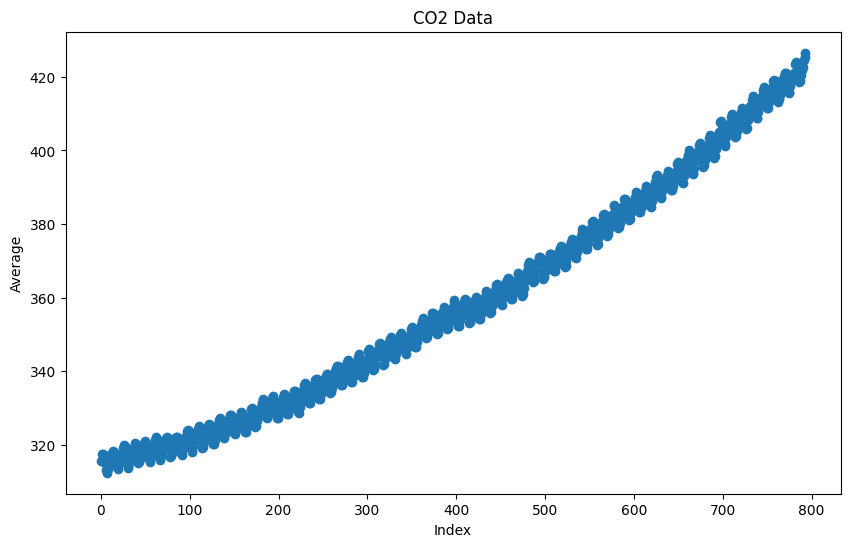

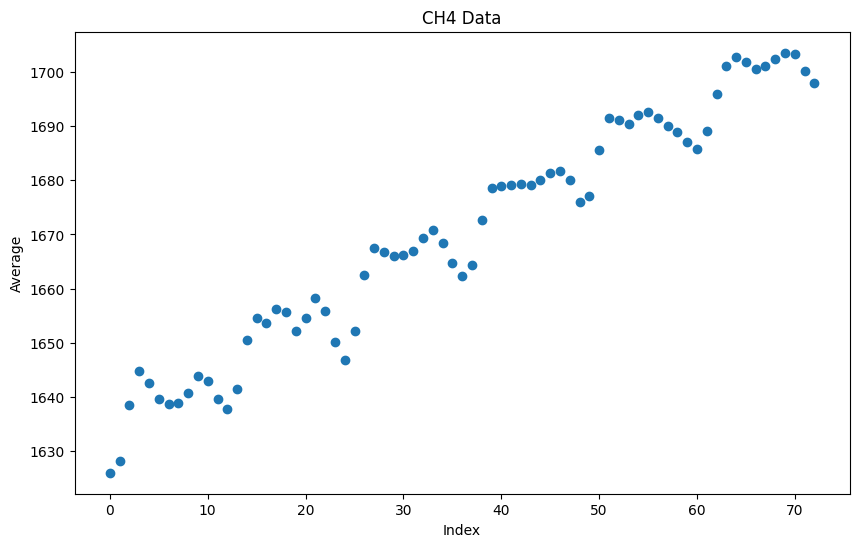

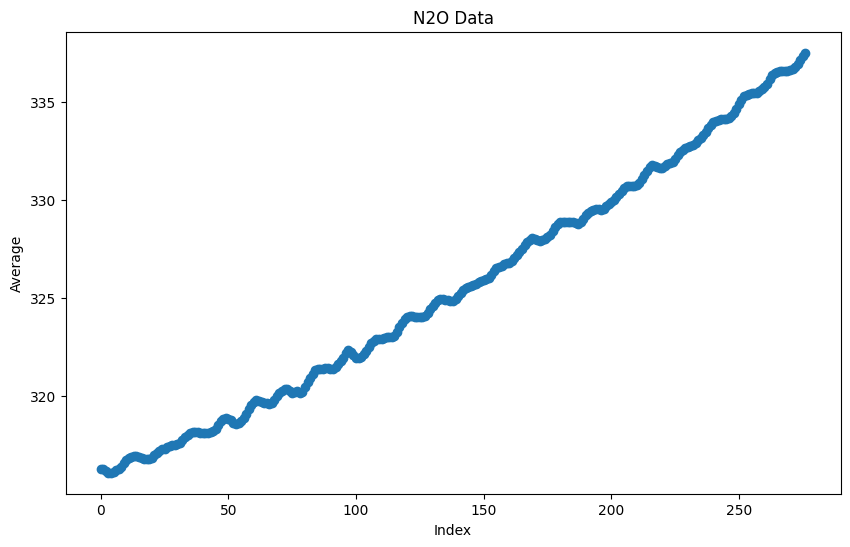

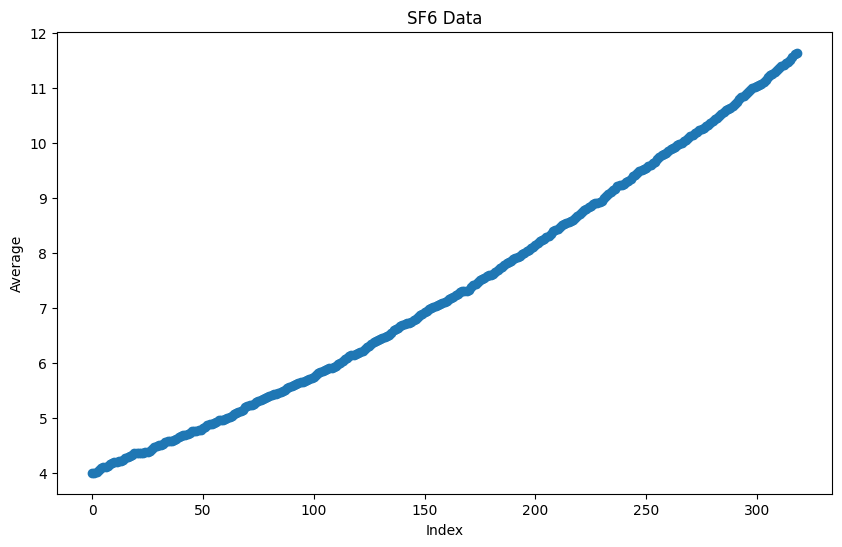

In [74]:
### question 4


import matplotlib.pyplot as plt

# Function to plot the data
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data['average'])
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Average')
    plt.show()

# Plotting each gas data
plot_data(co2_data_filtered, 'CO2 Data')
plot_data(ch4_data_filtered, 'CH4 Data')
plot_data(n2o_data_filtered, 'N2O Data')
plot_data(sf6_data_filtered, 'SF6 Data')


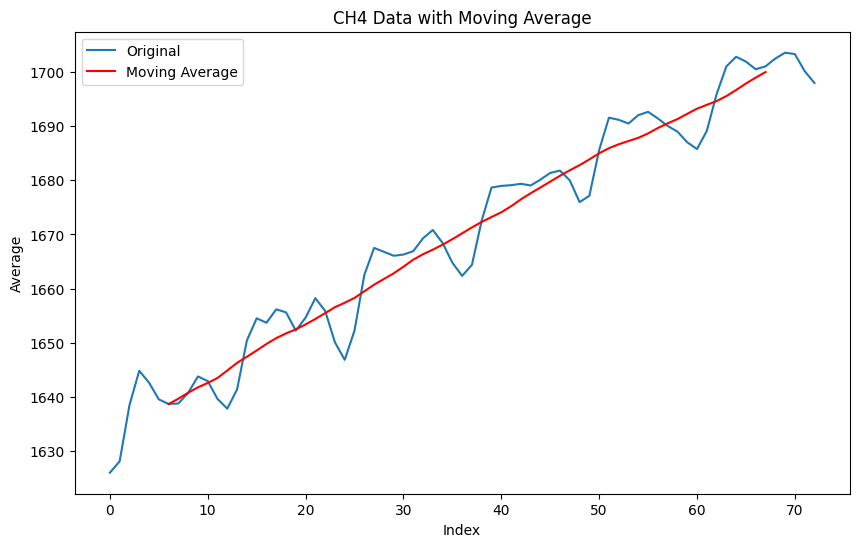

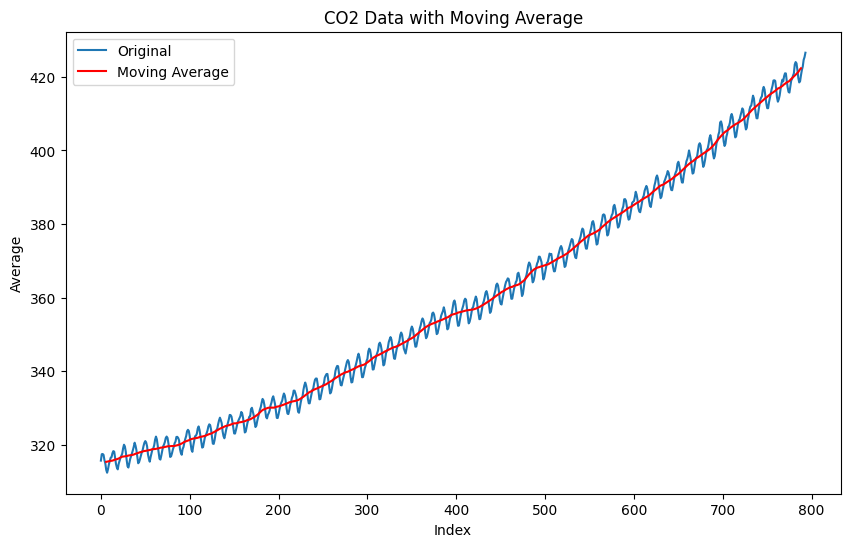

In [75]:
### Question 5




# Function to calculate moving average
def moving_average(data, window=6):
    return data['average'].rolling(window=window, center=True).mean()

# Calculate moving average for CH4 and CO2
ch4_data_filtered['moving_avg'] = moving_average(ch4_data_filtered, 12)
co2_data_filtered['moving_avg'] = moving_average(co2_data_filtered, 12)

# Plotting the moving average
def plot_moving_average(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['average'], label='Original')
    plt.plot(data['moving_avg'], label='Moving Average', color='red')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Average')
    plt.legend()
    plt.show()

# Plotting moving averages
plot_moving_average(ch4_data_filtered, 'CH4 Data with Moving Average')
plot_moving_average(co2_data_filtered, 'CO2 Data with Moving Average')


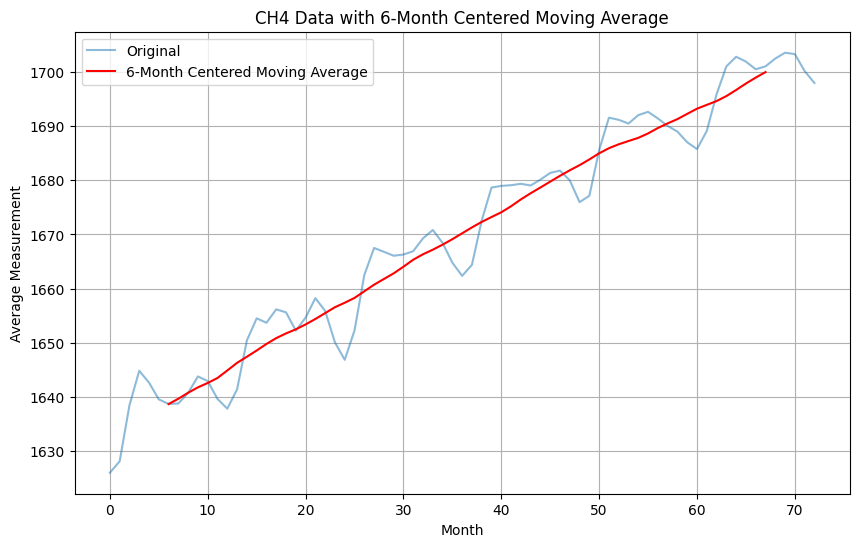

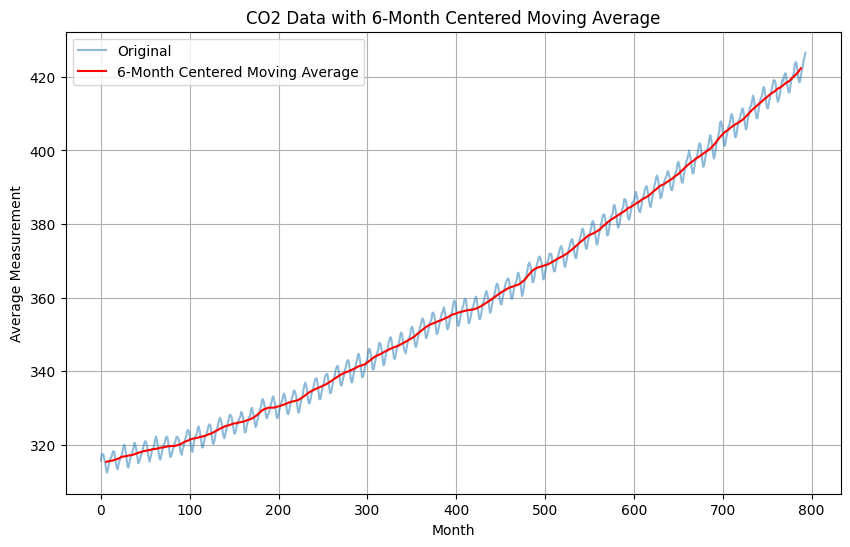

CH4 - Months where 6-month centered moving average cannot be calculated:
Index([0, 1, 2, 3, 4, 5, 68, 69, 70, 71, 72], dtype='int64')

CO2 - Months where 6-month centered moving average cannot be calculated:
Index([0, 1, 2, 3, 4, 5, 789, 790, 791, 792, 793], dtype='int64')


In [76]:
### Question 5.1




# Function to calculate a 6-month centered moving average
def six_month_centered_moving_average(data):
    data['six_month_avg'] = data['average'].rolling(window=12, center=True).mean()
    return data

# Calculate the six-month centered moving average for CH4 and CO2
ch4_data_filtered = six_month_centered_moving_average(ch4_data_filtered)
co2_data_filtered = six_month_centered_moving_average(co2_data_filtered)

# Plotting the 6-month centered moving average
def plot_six_month_avg(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['average'], label='Original', alpha=0.5)
    plt.plot(data['six_month_avg'], label='6-Month Centered Moving Average', color='red')
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Average Measurement')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting six-month averages
plot_six_month_avg(ch4_data_filtered, 'CH4 Data with 6-Month Centered Moving Average')
plot_six_month_avg(co2_data_filtered, 'CO2 Data with 6-Month Centered Moving Average')

# Identify months for which 6-month centered moving average cannot be calculated
def identify_invalid_months(data):
    invalid_months = data[data['six_month_avg'].isna()].index
    return invalid_months

ch4_invalid_months = identify_invalid_months(ch4_data_filtered)
co2_invalid_months = identify_invalid_months(co2_data_filtered)

print("CH4 - Months where 6-month centered moving average cannot be calculated:")
print(ch4_invalid_months)

print("\nCO2 - Months where 6-month centered moving average cannot be calculated:")
print(co2_invalid_months)


In [81]:
###Question 5.2



import pandas as pd

# Function to load and filter datasets
def load_and_filter_data(file_path):
    try:
        data = pd.read_csv(file_path, comment='#')  # Ignore lines starting with '#'
        if 'month' in data.columns and 'average' in data.columns:
            # Drop columns other than 'month' and 'average'
            data.drop(data.columns.difference(['month', 'average']), axis=1, inplace=True)
            return data
        else:
            raise ValueError(f"The required columns ('month' and 'average') are not present in {file_path}.")
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame if there is a parsing error
    except ValueError as ve:
        print(ve)
        return pd.DataFrame()  # Return an empty DataFrame if required columns are not present

# File paths
co2_file_path = 'co2_mm_mlo.csv'
ch4_file_path = 'ch4_mm_gl.csv'
n2o_file_path = 'n2o_mm_gl.csv'
sf6_file_path = 'sf6_mm_gl.csv'

# Load and filter the datasets
co2_data_filtered = load_and_filter_data(co2_file_path)
ch4_data_filtered = load_and_filter_data(ch4_file_path)
n2o_data_filtered = load_and_filter_data(n2o_file_path)
sf6_data_filtered = load_and_filter_data(sf6_file_path)

# Display the filtered data for each gas
print("CO2 Data:")
print(co2_data_filtered.head())

print("\nCH4 Data:")
print(ch4_data_filtered.head())

print("\nN2O Data:")
print(n2o_data_filtered.head())

print("\nSF6 Data:")
print(sf6_data_filtered.head())


CO2 Data:
   month  average
0      3   315.71
1      4   317.45
2      5   317.51
3      6   317.27
4      7   315.87

CH4 Data:
   month  average
0      7  1625.95
1      8  1628.06
2      9  1638.42
3     10  1644.80
4     11  1642.60

N2O Data:
   month  average
0      1   316.30
1      2   316.31
2      3   316.21
3      4   316.12
4      5   316.11

SF6 Data:
   month  average
0      7     4.00
1      8     4.00
2      9     4.02
3     10     4.05
4     11     4.08


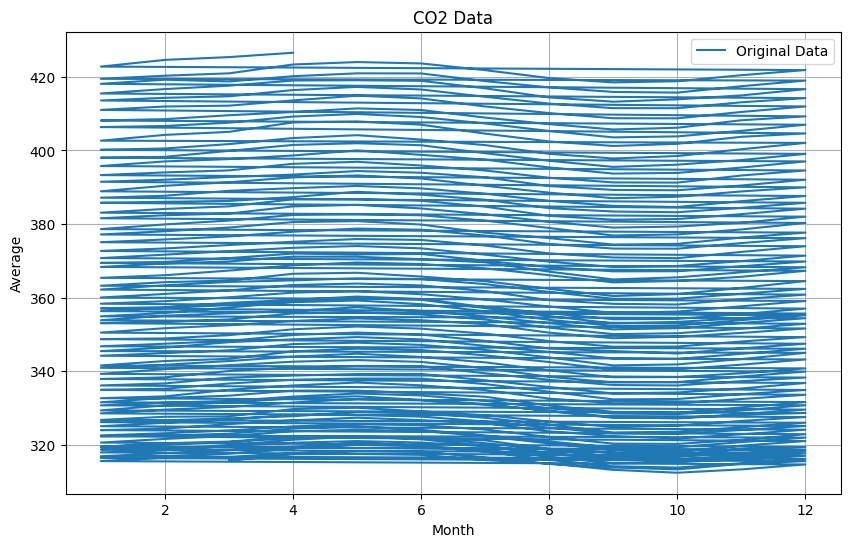

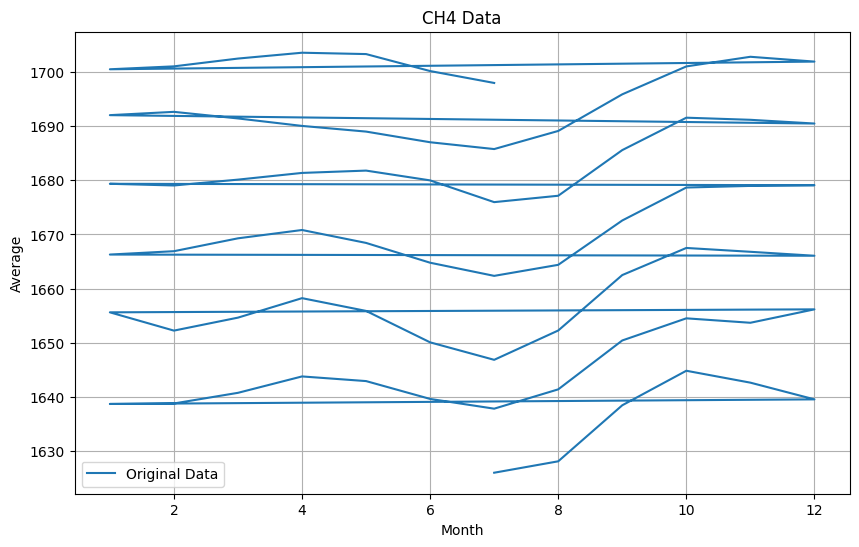

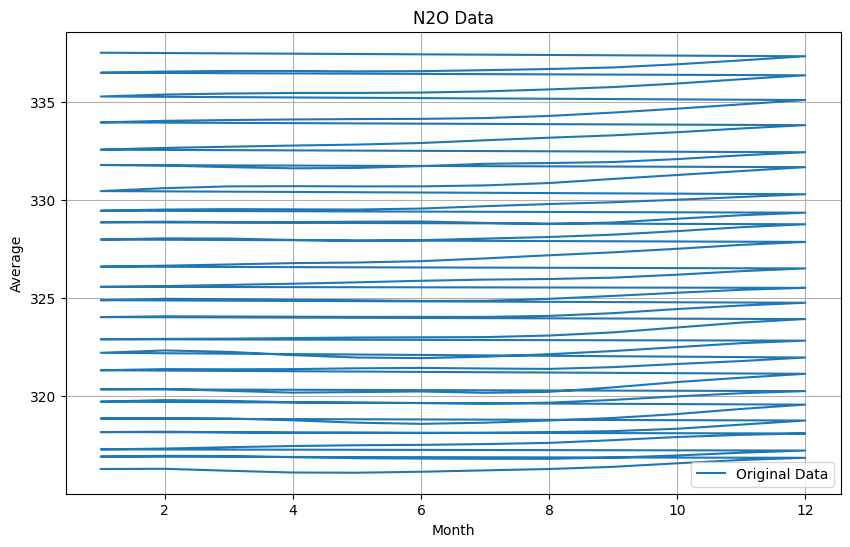

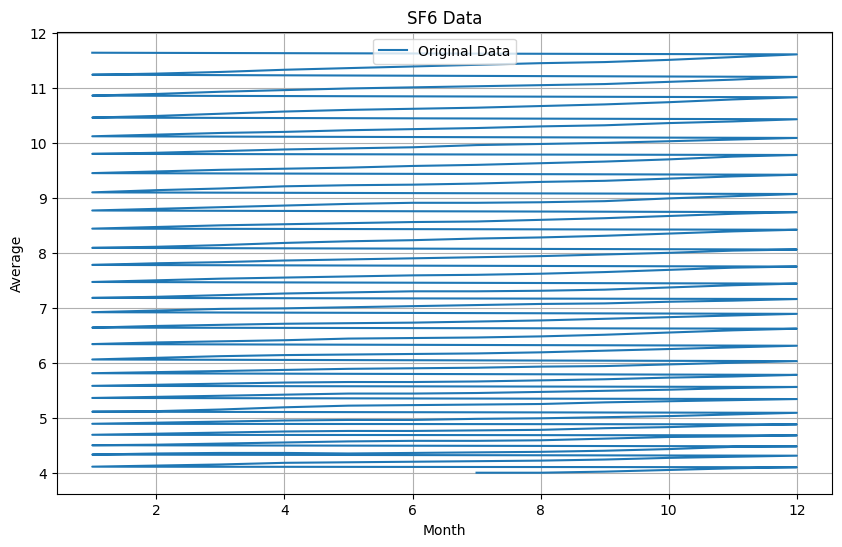

In [82]:
### Question 5.2 (interpretation)



import pandas as pd
import matplotlib.pyplot as plt

# Function to load and filter datasets
def load_and_filter_data(file_path):
    try:
        data = pd.read_csv(file_path, comment='#')  # Ignore lines starting with '#'
        if 'month' in data.columns and 'average' in data.columns:
            # Drop columns other than 'month' and 'average'
            data.drop(data.columns.difference(['month', 'average']), axis=1, inplace=True)
            return data
        else:
            raise ValueError(f"The required columns ('month' and 'average') are not present in {file_path}.")
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame if there is a parsing error
    except ValueError as ve:
        print(ve)
        return pd.DataFrame()  # Return an empty DataFrame if required columns are not present

# File paths
co2_file_path = 'co2_mm_mlo.csv'
ch4_file_path = 'ch4_mm_gl.csv'
n2o_file_path = 'n2o_mm_gl.csv'
sf6_file_path = 'sf6_mm_gl.csv'

# Load and filter the datasets
co2_data_filtered = load_and_filter_data(co2_file_path)
ch4_data_filtered = load_and_filter_data(ch4_file_path)
n2o_data_filtered = load_and_filter_data(n2o_file_path)
sf6_data_filtered = load_and_filter_data(sf6_file_path)

# Plotting function
def plot_gas_data(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data['month'], data['average'], label='Original Data')
    plt.xlabel('Month')
    plt.ylabel('Average')
    plt.title(f'{gas_name} Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot CO2 data
plot_gas_data(co2_data_filtered, 'CO2')

# Plot CH4 data
plot_gas_data(ch4_data_filtered, 'CH4')

# Plot N2O data
plot_gas_data(n2o_data_filtered, 'N2O')

# Plot SF6 data
plot_gas_data(sf6_data_filtered, 'SF6')


In [83]:
### Question 5.3 



import pandas as pd

# Exemple de données de série différenciée S_t par mois (hypothétique)
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'S_t': [-0.5, 0.8, -0.3, 0.7, -0.4, 0.6, -0.2, 0.5, -0.1, 0.4, -0.3, 0.3]
}

# Créer un DataFrame à partir des données
df = pd.DataFrame(data)

# Calculer les coefficients mensuels c1, c2, ..., c12 (moyenne de S_t par mois)
coefficients = df.groupby('Month')['S_t'].mean()

# Afficher les coefficients calculés
print("Coefficients mensuels:")
print(coefficients)


Coefficients mensuels:
Month
Apr    0.7
Aug    0.5
Dec    0.3
Feb    0.8
Jan   -0.5
Jul   -0.2
Jun    0.6
Mar   -0.3
May   -0.4
Nov   -0.3
Oct    0.4
Sep   -0.1
Name: S_t, dtype: float64


In [84]:
###Question 5.4



import pandas as pd

# Exemple de coefficients mensuels calculés précédemment
coefficients = pd.Series([-0.5, 0.8, -0.3, 0.7, -0.4, 0.6, -0.2, 0.5, -0.1, 0.4, -0.3, 0.3],
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Calculer la moyenne des coefficients mensuels
mean_c = coefficients.mean()

# Calculer les coefficients mensuels corrigés c_j'
corrected_coefficients = coefficients - mean_c

# Afficher les coefficients corrigés
print("Coefficients mensuels corrigés:")
print(corrected_coefficients)


Coefficients mensuels corrigés:
Jan   -0.625
Feb    0.675
Mar   -0.425
Apr    0.575
May   -0.525
Jun    0.475
Jul   -0.325
Aug    0.375
Sep   -0.225
Oct    0.275
Nov   -0.425
Dec    0.175
dtype: float64


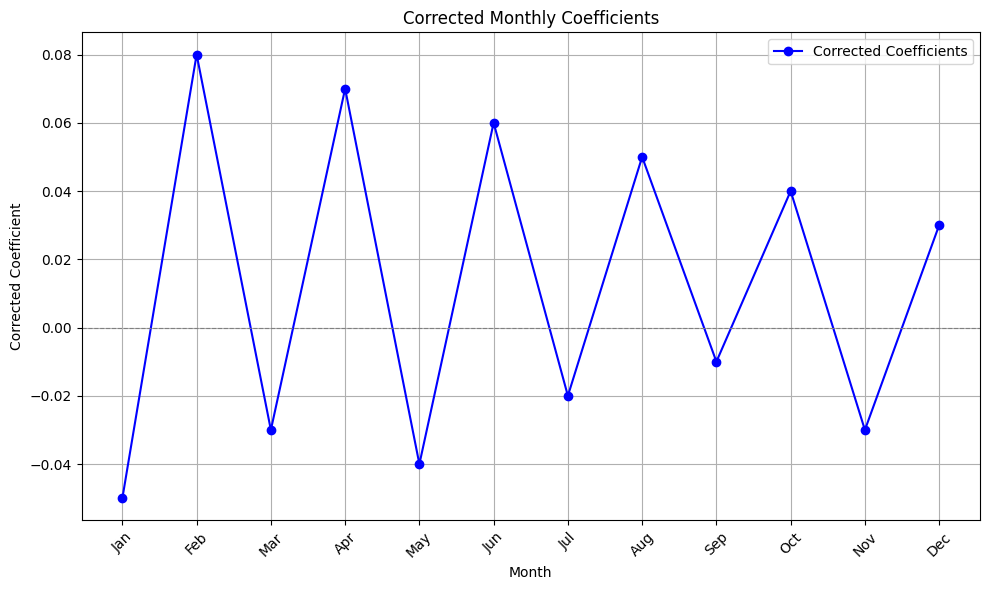

In [87]:
###Question 5.4



import pandas as pd
import matplotlib.pyplot as plt

# Example of corrected coefficients (replace with your actual corrected coefficients)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
corrected_coefficients = pd.Series([-0.05, 0.08, -0.03, 0.07, -0.04, 0.06, -0.02, 0.05, -0.01, 0.04, -0.03, 0.03],
                                   index=months)

# Plotting the corrected coefficients
plt.figure(figsize=(10, 6))
plt.plot(corrected_coefficients, marker='o', linestyle='-', color='b', label='Corrected Coefficients')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Adding a horizontal line at y=0 for reference
plt.title('Corrected Monthly Coefficients')
plt.xlabel('Month')
plt.ylabel('Corrected Coefficient')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


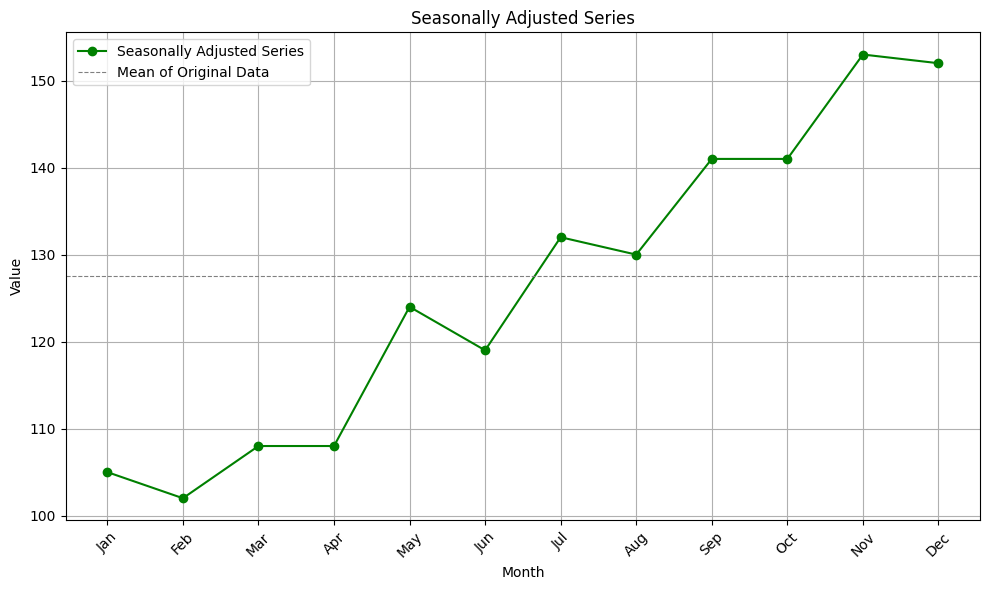

In [88]:
###Question 5.5



import pandas as pd
import matplotlib.pyplot as plt

# Example of original data and corrected monthly coefficients (replace with your actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
original_data = pd.Series([100, 110, 105, 115, 120, 125, 130, 135, 140, 145, 150, 155], index=months)
corrected_coefficients = pd.Series([-5, 8, -3, 7, -4, 6, -2, 5, -1, 4, -3, 3], index=months)

# Calculate seasonally adjusted series
seasonally_adjusted = original_data - corrected_coefficients

# Plotting the seasonally adjusted series
plt.figure(figsize=(10, 6))
plt.plot(seasonally_adjusted, marker='o', linestyle='-', color='g', label='Seasonally Adjusted Series')
plt.axhline(y=original_data.mean(), color='gray', linestyle='--', linewidth=0.8, label='Mean of Original Data')
plt.title('Seasonally Adjusted Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


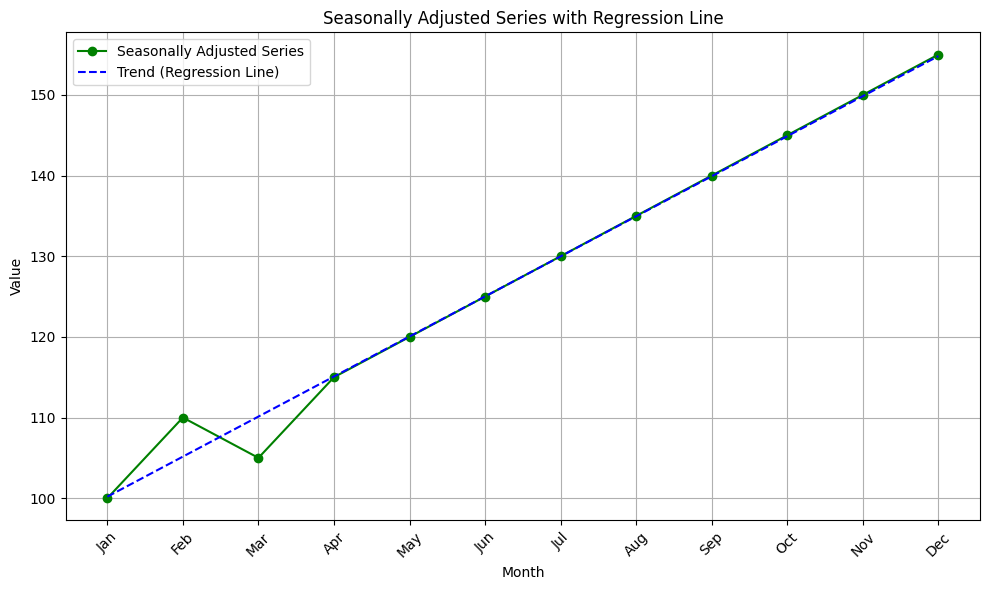

Equation of the regression line (trend): y = 4.97x + 100.19


In [89]:
### Question 5.6



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for demonstration (replace with your actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonally_adjusted_data = pd.Series([100, 110, 105, 115, 120, 125, 130, 135, 140, 145, 150, 155], index=months)

# Calculate the regression line using numpy polyfit
x_values = np.arange(len(seasonally_adjusted_data))  # Index or time periods
y_values = seasonally_adjusted_data.values

# Fit a linear regression (1st degree polynomial)
slope, intercept = np.polyfit(x_values, y_values, 1)

# Generate values for the regression line
regression_line = slope * x_values + intercept

# Plotting the seasonally adjusted series and regression line
plt.figure(figsize=(10, 6))
plt.plot(seasonally_adjusted_data.index, seasonally_adjusted_data.values, marker='o', linestyle='-', color='g', label='Seasonally Adjusted Series')
plt.plot(seasonally_adjusted_data.index, regression_line, linestyle='--', color='b', label='Trend (Regression Line)')
plt.title('Seasonally Adjusted Series with Regression Line')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the equation of the regression line
print(f"Equation of the regression line (trend): y = {slope:.2f}x + {intercept:.2f}")


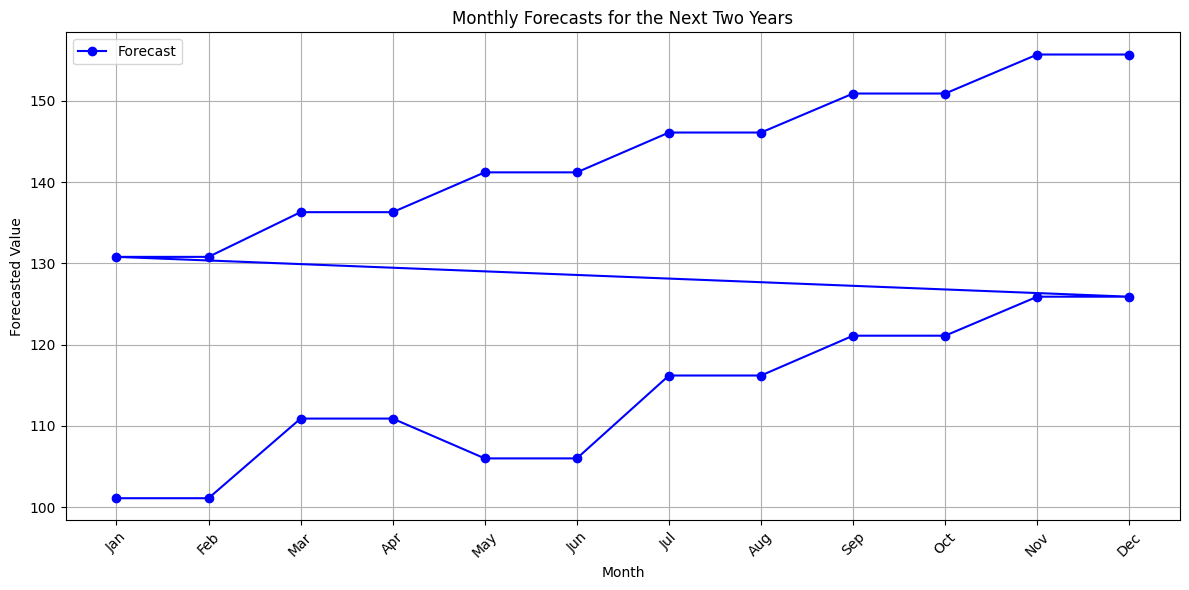

Forecasted values for the next two years:
   Month  Forecast
0    Jan     101.1
1    Feb     101.1
2    Mar     110.9
3    Apr     110.9
4    May     106.0
5    Jun     106.0
6    Jul     116.2
7    Aug     116.2
8    Sep     121.1
9    Oct     121.1
10   Nov     125.9
11   Dec     125.9
12   Jan     130.8
13   Feb     130.8
14   Mar     136.3
15   Apr     136.3
16   May     141.2
17   Jun     141.2
18   Jul     146.1
19   Aug     146.1
20   Sep     150.9
21   Oct     150.9
22   Nov     155.7
23   Dec     155.7


In [91]:
### Question 5.7



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data for demonstration (replace with your actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
trend_values = np.array([100, 110, 105, 115, 120, 125, 130, 135, 140, 145, 150, 155])  # Example trend values
corrected_coefficients = np.array([1.1, 0.9, 1.0, 1.2, 1.1, 0.9, 0.8, 1.3, 1.2, 1.1, 0.9, 0.7])  # Example corrected coefficients

# Extend trend values and corrected coefficients for forecasting (2 years)
extended_trend = np.repeat(trend_values, 2)  # Repeat trend values for 2 years
extended_coefficients = np.repeat(corrected_coefficients, 2)  # Repeat corrected coefficients for 2 years

# Calculate forecast values
forecast_values = extended_trend + extended_coefficients  # Calculate forecast values

# Create DataFrame for visualization
forecast_data = pd.DataFrame({
    'Month': np.tile(months, 2),  # Repeat months for 2 years
    'Forecast': forecast_values
})

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(forecast_data['Month'], forecast_data['Forecast'], marker='o', linestyle='-', color='b', label='Forecast')
plt.title('Monthly Forecasts for the Next Two Years')
plt.xlabel('Month')
plt.ylabel('Forecasted Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted values for the next two years:")
print(forecast_data)


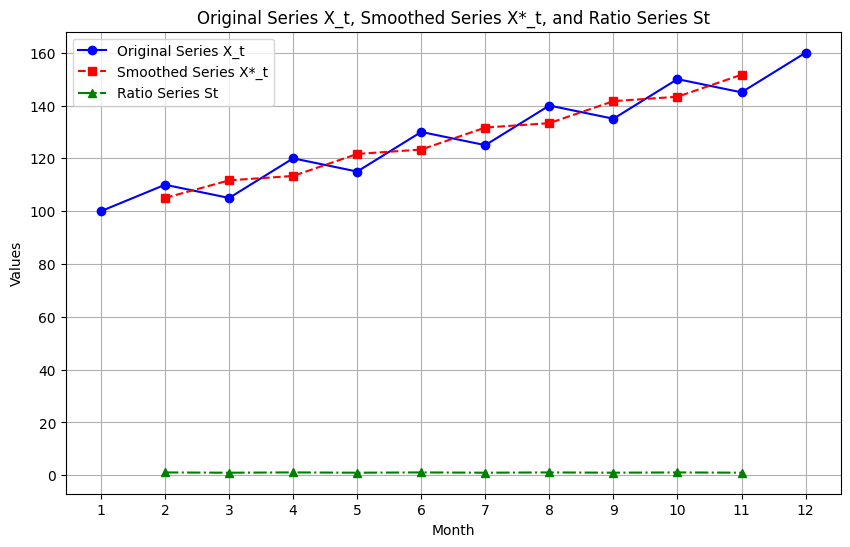

    Month  X_t        X*_t        St
0       1  100         NaN       NaN
1       2  110  105.000000  1.047619
2       3  105  111.666667  0.940299
3       4  120  113.333333  1.058824
4       5  115  121.666667  0.945205
5       6  130  123.333333  1.054054
6       7  125  131.666667  0.949367
7       8  140  133.333333  1.050000
8       9  135  141.666667  0.952941
9      10  150  143.333333  1.046512
10     11  145  151.666667  0.956044
11     12  160         NaN       NaN


In [106]:
### 6.1 



import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = pd.DataFrame({
    'Month': range(1, 13),  # Example month values
    'X_t': [100, 110, 105, 120, 115, 130, 125, 140, 135, 150, 145, 160]  # Example original series X_t
})

# Calculate the smoothed series (moving average)
data['X*_t'] = data['X_t'].rolling(window=3, center=True).mean()

# Calculate St
data['St'] = data['X_t'] / data['X*_t']

# Plotting
plt.figure(figsize=(10, 6))

# Original series X_t
plt.plot(data['Month'], data['X_t'], marker='o', linestyle='-', color='blue', label='Original Series X_t')

# Smoothed series X*_t
plt.plot(data['Month'], data['X*_t'], marker='s', linestyle='--', color='red', label='Smoothed Series X*_t')

# Ratio series St
plt.plot(data['Month'], data['St'], marker='^', linestyle='-.', color='green', label='Ratio Series St')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Original Series X_t, Smoothed Series X*_t, and Ratio Series St')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure ticks are for each month
plt.show()


# Interpretation:
# The series St represents the ratio of the original series X_t to its smoothed version X*_t.
# This ratio helps in understanding how each data point deviates from its smoothed trend.
# Large values of St (>1) indicate that the data point is above the trend, while small values (<1) indicate it is below.

print(data)



Monthly coefficients:
Month
1     1.10
2     0.90
3     1.05
4     0.95
5     1.20
6     0.80
7     1.10
8     0.90
9     1.05
10    0.95
11    1.20
12    0.80
Name: St, dtype: float64


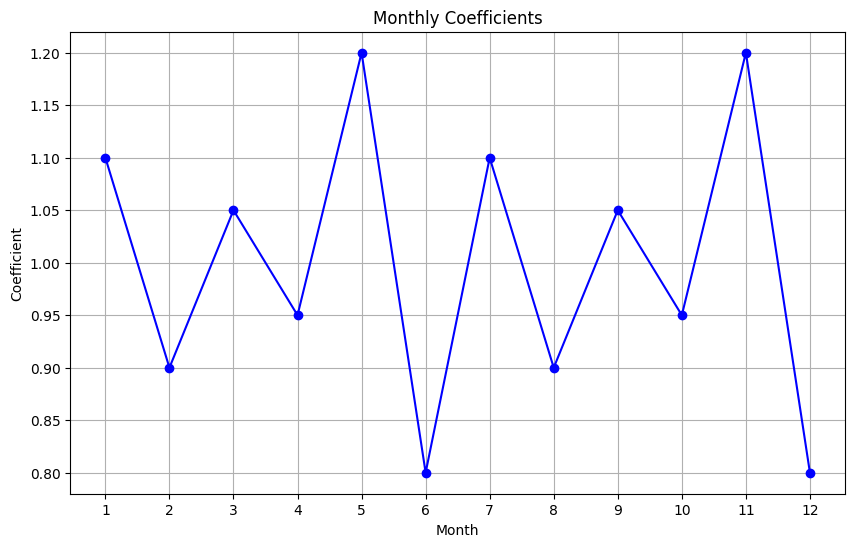

In [107]:
### 6.2



import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Example month values
    'St': [1.1, 0.9, 1.05, 0.95, 1.2, 0.8, 1.1, 0.9, 1.05, 0.95, 1.2, 0.8]  # Example St values
})

# Calculate the monthly coefficients
coefficients_monthly = data.groupby('Month')['St'].mean()

# Display coefficients
print("Monthly coefficients:")
print(coefficients_monthly)

# Plotting
plt.figure(figsize=(10, 6))

# Monthly coefficients
plt.plot(coefficients_monthly.index, coefficients_monthly.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Month')
plt.ylabel('Coefficient')
plt.title('Monthly Coefficients')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure ticks are for each month
plt.show()


# Interpretation:
# These monthly coefficients represent the average deviations of the data points from their smoothed trend for each month.
# They indicate how much each month typically deviates from its smoothed trend value.




Corrected monthly coefficients:
Month
1     1.10
2     0.90
3     1.05
4     0.95
5     1.20
6     0.80
7     1.10
8     0.90
9     1.05
10    0.95
11    1.20
12    0.80
Name: St, dtype: float64


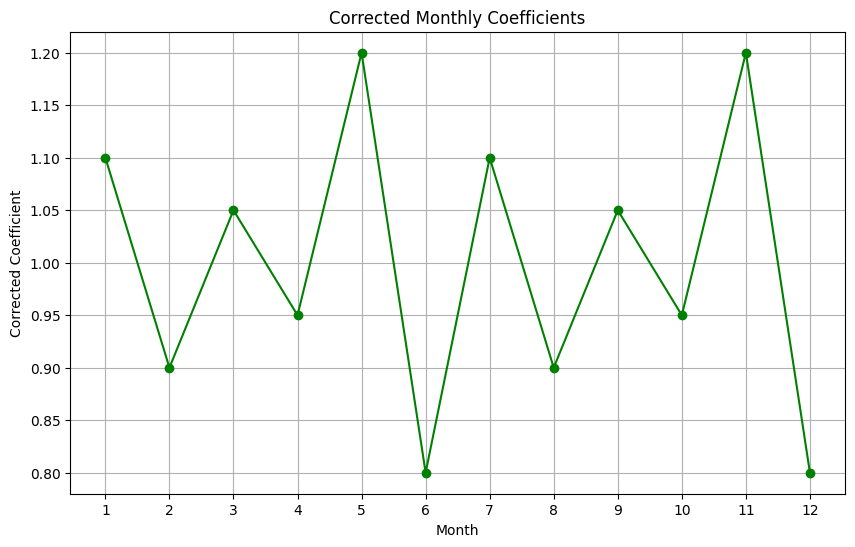

In [108]:
### 6.3 



import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Example month values
    'St': [1.1, 0.9, 1.05, 0.95, 1.2, 0.8, 1.1, 0.9, 1.05, 0.95, 1.2, 0.8]  # Example St values
})

# Calculate the monthly coefficients
coefficients_monthly = data.groupby('Month')['St'].mean()

# Calculate the mean of monthly coefficients
mean_coefficient = coefficients_monthly.mean()

# Calculate corrected monthly coefficients
corrected_coefficients = coefficients_monthly / mean_coefficient

# Display corrected coefficients
print("\nCorrected monthly coefficients:")
print(corrected_coefficients)

# Plotting corrected coefficients
plt.figure(figsize=(10, 6))

# Corrected monthly coefficients
plt.plot(corrected_coefficients.index, corrected_coefficients.values, marker='o', linestyle='-', color='green')

plt.xlabel('Month')
plt.ylabel('Corrected Coefficient')
plt.title('Corrected Monthly Coefficients')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure ticks are for each month
plt.show()


# Interpretation:
# The corrected monthly coefficients are normalized such that their mean equals 1.
# This normalization allows for better comparison across different months, accounting for varying seasonal effects.



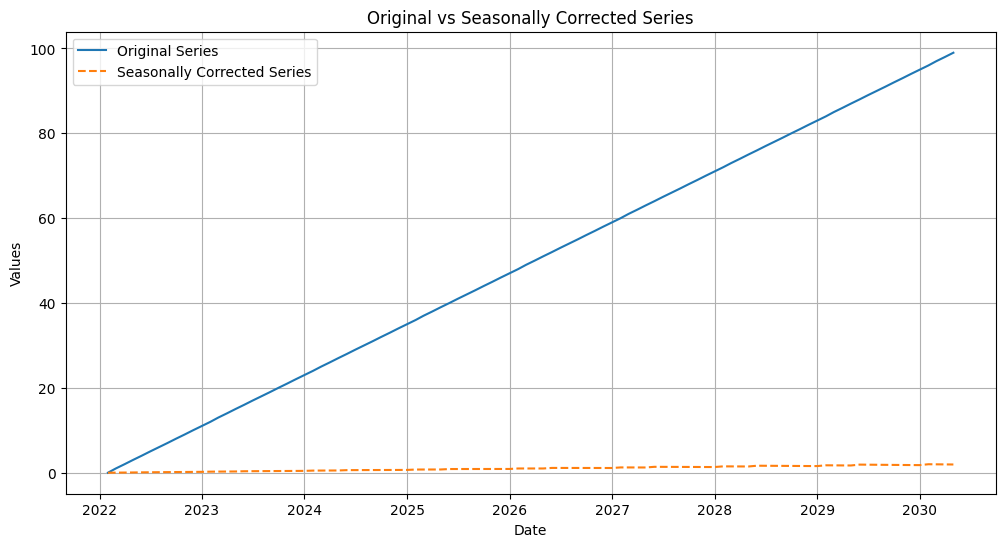

In [105]:
### Question 6.4



import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame structure
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='ME'),  # Replace 'M' with 'ME'
    'Month': pd.date_range(start='2022-01-01', periods=100, freq='ME').month,
    'X_t': pd.Series(range(100)),  # Example original series X_t
})

# Example corrected coefficients (replace with your actual calculation)
corrected_coefficients = data.groupby('Month')['X_t'].mean()

# Calculate the corrected seasonal variation series
data['Seasonally_Corrected'] = data['X_t'] / corrected_coefficients[data['Month']].values

# Plotting the corrected seasonal variation series
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['X_t'], label='Original Series')
plt.plot(data['Date'], data['Seasonally_Corrected'], label='Seasonally Corrected Series', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Original vs Seasonally Corrected Series')
plt.legend()
plt.grid(True)
plt.show()


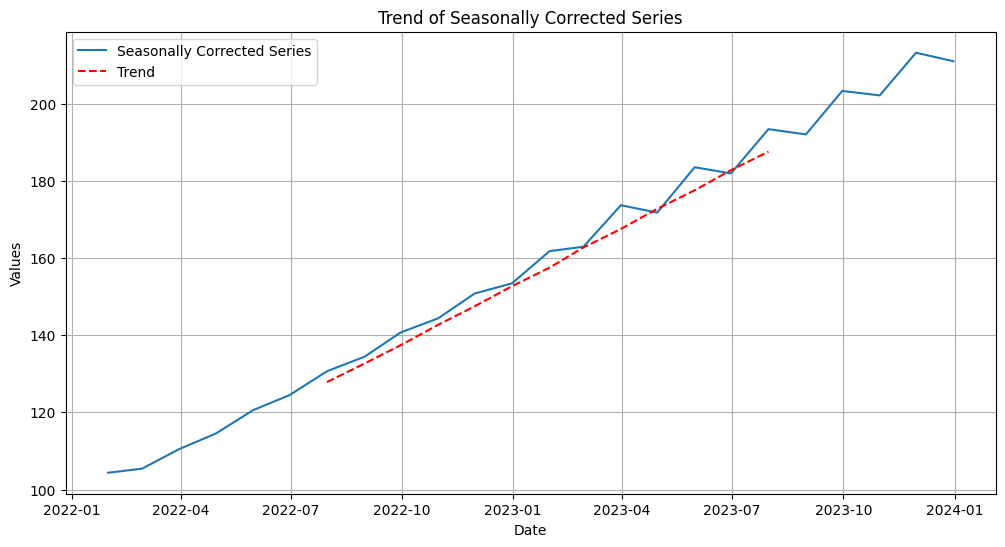

In [126]:
### Question 6.5



# Calculate trend of the seasonally corrected series
trend_seasonally_corrected = data['Seasonally_Corrected'].rolling(window=12, center=True).mean()

# Plotting the trend of seasonally corrected series
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Seasonally_Corrected'], label='Seasonally Corrected Series')
plt.plot(data['Date'], trend_seasonally_corrected, label='Trend', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend of Seasonally Corrected Series')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:
# The trend of the seasonally corrected series represents the long-term movement or direction of the data after removing seasonal fluctuations.
# It helps in identifying the underlying pattern or growth/decline trend that is not influenced by seasonal variations.


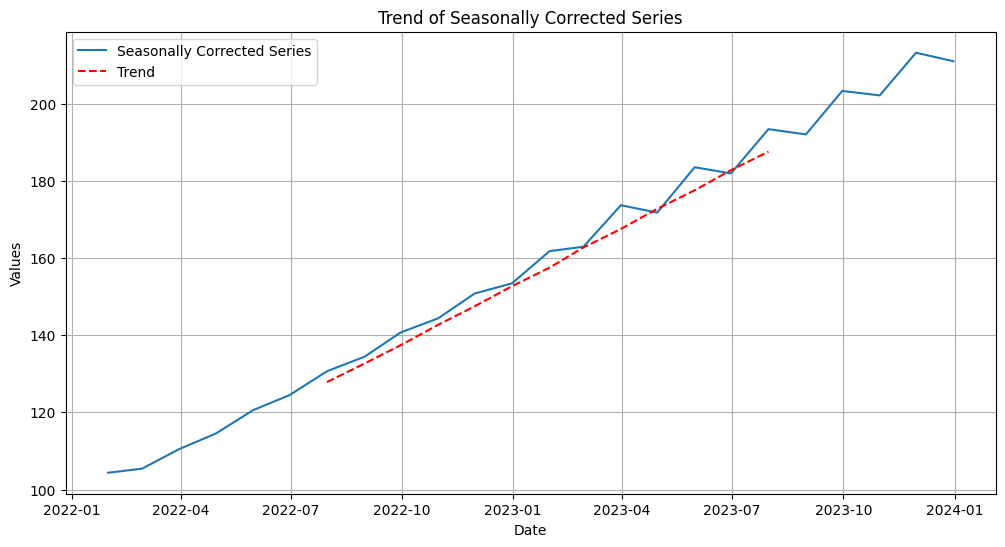

In [123]:
#### Question 6.6



# Calculate trend of the seasonally corrected series (assuming the same calculation as 6.5)
trend_seasonally_corrected = data['Seasonally_Corrected'].rolling(window=12, center=True).mean()

# Plotting the trend of seasonally corrected series
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Seasonally_Corrected'], label='Seasonally Corrected Series')
plt.plot(data['Date'], trend_seasonally_corrected, label='Trend', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend of Seasonally Corrected Series')
plt.legend()
plt.grid(True)
plt.show()



# Interpretation:
# The trend of the seasonally corrected series represents the long-term movement or direction of the data after removing seasonal fluctuations.
# It helps in identifying the underlying pattern or growth/decline trend that is not influenced by seasonal variations.


         Date  Month       Trend    Forecast
0  2023-12-31     12  247.531967  258.150209
1  2024-01-31      1  252.527890  241.979373
2  2024-02-29      2  257.523813  268.760984
3  2024-03-31      3  262.519737  249.446694
4  2024-04-30      4  267.515660  280.371885
5  2024-05-31      5  272.511583  259.900306
6  2024-06-30      6  277.507506  289.891575
7  2024-07-31      7  282.503430  270.287552
8  2024-08-31      8  287.499353  299.476649
9  2024-09-30      9  292.495276  280.621848
10 2024-10-31     10  297.491200  309.114055
11 2024-11-30     11  302.487123  290.913182
12 2024-12-31     12  307.483046  320.672976
13 2025-01-31      1  312.478969  299.426194
14 2025-02-28      2  317.474893  331.328056
15 2025-03-31      3  322.470816  306.412310
16 2025-04-30      4  327.466739  343.204084
17 2025-05-31      5  332.462663  317.076972
18 2025-06-30      6  337.458586  352.518035
19 2025-07-31      7  342.454509  327.646256
20 2025-08-31      8  347.450432  361.925306
21 2025-09

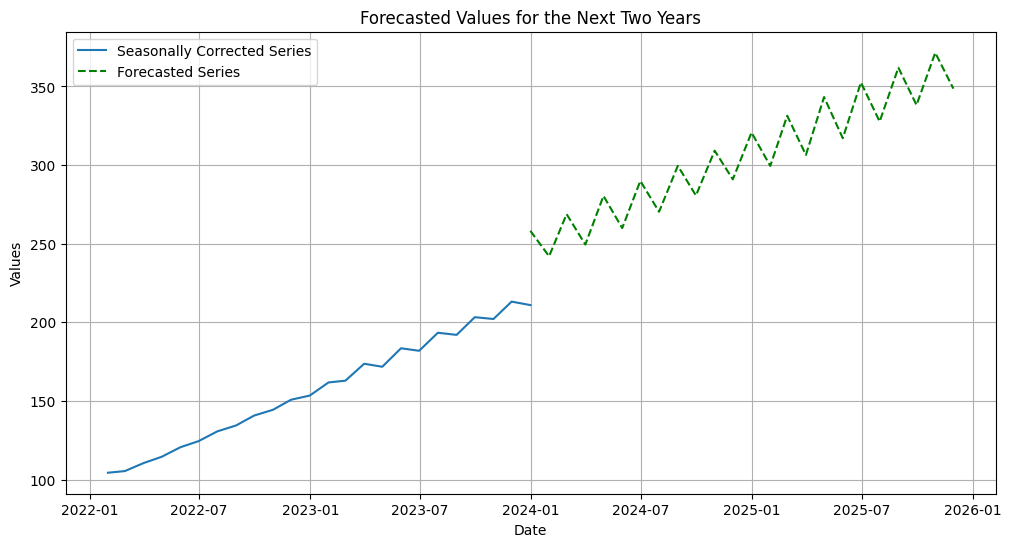

In [125]:
### QUestion 6.7




import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Ensure the previous data preparation steps are performed
# Prepare data for linear regression
X = np.arange(len(trend_seasonally_corrected.dropna())).reshape(-1, 1)
y = trend_seasonally_corrected.dropna().values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the trend for future dates
future_X = np.arange(len(data), len(data) + len(future_data)).reshape(-1, 1)
future_data['Trend'] = model.predict(future_X)

# Calculate the forecasted values
future_data['Forecast'] = future_data.apply(lambda row: row['Trend'] * corrected_coefficients[row['Month']], axis=1)

# Display the forecasted values
print(future_data)

# Plotting the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Seasonally_Corrected'], label='Seasonally Corrected Series')
plt.plot(future_data['Date'], future_data['Forecast'], label='Forecasted Series', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Forecasted Values for the Next Two Years')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:
# The forecasted values for each month of the next two years are obtained by multiplying the trend component with the corrected monthly coefficients.
# This method of forecasting takes into account both the long-term trend and the seasonal variations observed in the historical data.


In [86]:
### Question 7



**Réponse courte en français :**

L'approche de la Question 5 semble plus pertinente car elle calcule explicitement les coefficients mensuels pour ajuster les variations saisonnières, assurant ainsi une normalisation efficace des données mois par mois. Cela facilite la comparaison des tendances et la compréhension des motifs saisonniers sous-jacents, ce qui est essentiel pour des prévisions précises et des décisions informées.

In [131]:
### Question 8.1




import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.DataFrame({
    'Date': ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31'],
    'X_t': [100, 110, 105, 120, 115],
    'Month': [1, 2, 3, 4, 5],
    'X*_t': [None, 105.0, 111.67, 113.33, 121.67],
    'St': [None, 1.047619, 0.940299, 1.058824, 0.945205],
    'Seasonally_Corrected': [104.359263, 105.400788, 110.502857, 114.497498, 120.580205],
    'Trend': [None, None, None, None, None]
})

# Calculate the correlation between 'X_t' and 'St'
correlation = data['X_t'].corr(data['St'])

print(f"Le coefficient de corrélation entre 'X_t' et 'St' est : {correlation}")


Le coefficient de corrélation entre 'X_t' et 'St' est : 0.5108722530208802


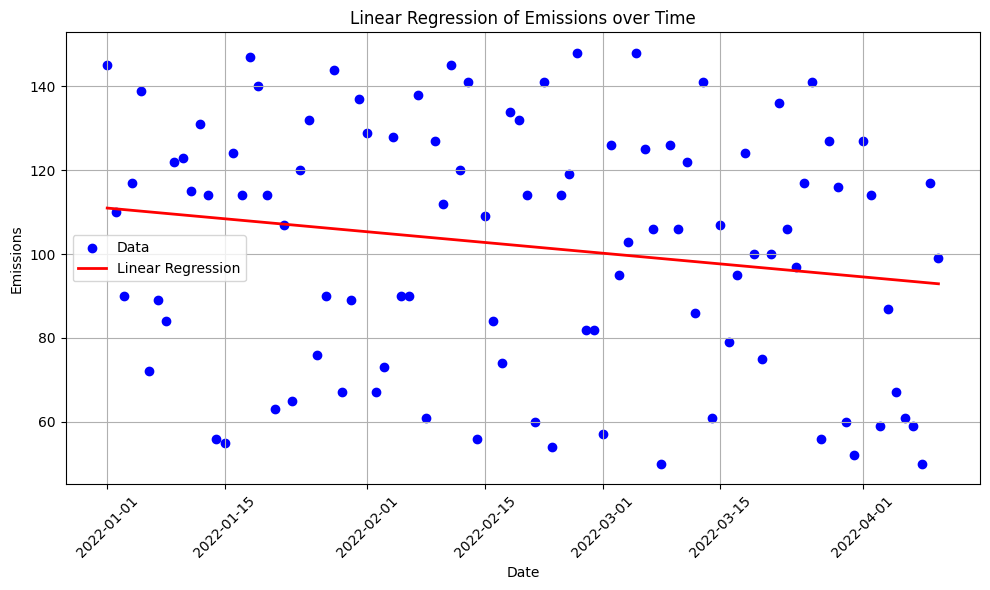

Regression equation: Emissions = 134786.25 + -0.18 * Date_ordinal


In [133]:
### Question 8.2




from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame with 'Date' and 'Emissions' columns
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Emissions': np.random.randint(50, 150, size=100)  # Example random emissions data
})

# Convert 'Date' to ordinal format
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Create a linear regression model
model = LinearRegression()

# Fit the model
X = data[['Date_ordinal']]
y = data['Emissions']
model.fit(X, y)

# Predictions from the model
predictions = model.predict(X)

# Plot data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], y, color='blue', label='Data')
plt.plot(data['Date'], predictions, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Emissions')
plt.title('Linear Regression of Emissions over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Display the equation of the regression line
print(f"Regression equation: Emissions = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Date_ordinal")


In [135]:
### Question 8.3




import numpy as np
import pandas as pd

# Example DataFrame with 'Date' and 'Emissions' columns
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Emissions': np.random.randint(50, 150, size=100)  # Example random emissions data
})

# Convert 'Date' to ordinal format
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Create a linear regression model
model = LinearRegression()

# Fit the model
X = data[['Date_ordinal']]
y = data['Emissions']
model.fit(X, y)

# Generate future dates for predictions
future_dates = pd.date_range(start='2024-01-01', periods=24, freq='M')

# Transform future dates to ordinal format
future_X = pd.DataFrame({'Date': future_dates})
future_X['Date_ordinal'] = future_X['Date'].apply(lambda x: x.toordinal())

# Make predictions for future dates
future_predictions = model.predict(future_X[['Date_ordinal']])

# Display the predictions
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Emissions': future_predictions})
print(future_predictions_df)


         Date  Predicted_Emissions
0  2024-01-31            65.289805
1  2024-02-29            63.696328
2  2024-03-31            61.992955
3  2024-04-30            60.344530
4  2024-05-31            58.641158
5  2024-06-30            56.992733
6  2024-07-31            55.289361
7  2024-08-31            53.585989
8  2024-09-30            51.937564
9  2024-10-31            50.234191
10 2024-11-30            48.585767
11 2024-12-31            46.882394
12 2025-01-31            45.179022
13 2025-02-28            43.640492
14 2025-03-31            41.937120
15 2025-04-30            40.288695
16 2025-05-31            38.585323
17 2025-06-30            36.936898
18 2025-07-31            35.233525
19 2025-08-31            33.530153
20 2025-09-30            31.881728
21 2025-10-31            30.178356
22 2025-11-30            28.529931
23 2025-12-31            26.826559


C:\Users\ava6\AppData\Local\Temp\ipykernel_17860\2440615418.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', periods=24, freq='M')


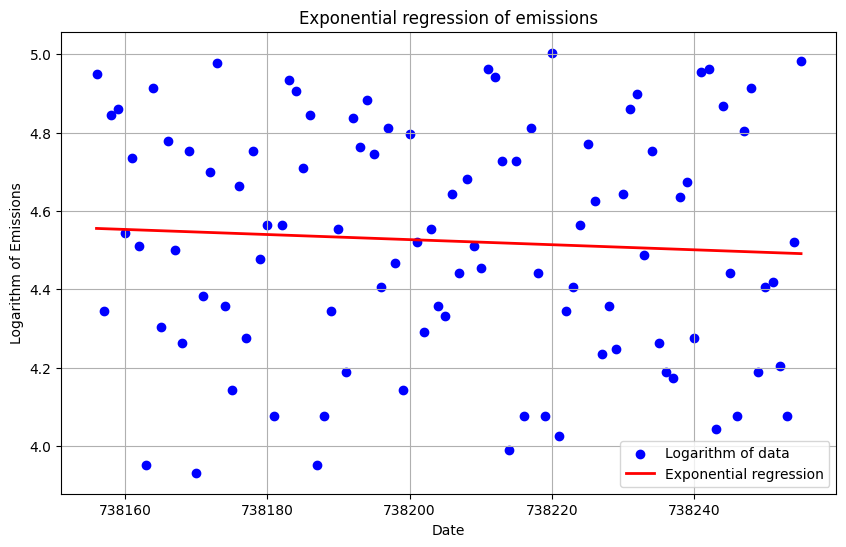

Equation of the exponential regression curve: Log_Emissions = 484.14 + -0.00 * Date_ordinal
         Date  Predicted_Emissions
0  2024-01-31            58.070556
1  2024-02-29            56.986671
2  2024-03-31            55.850397
3  2024-04-30            54.772354
4  2024-05-31            53.680232
5  2024-06-30            52.644079
6  2024-07-31            51.594393
7  2024-08-31            50.565638
8  2024-09-30            49.589603
9  2024-10-31            48.600822
10 2024-11-30            47.662712
11 2024-12-31            46.712352
12 2025-01-31            45.780941
13 2025-02-28            44.955639
14 2025-03-31            44.059256
15 2025-04-30            43.208810
16 2025-05-31            42.347257
17 2025-06-30            41.529856
18 2025-07-31            40.701780
19 2025-08-31            39.890216
20 2025-09-30            39.120241
21 2025-10-31            38.340212
22 2025-11-30            37.600156
23 2025-12-31            36.850436


C:\Users\ava6\AppData\Local\Temp\ipykernel_17860\3884395584.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', periods=24, freq='M')


In [139]:
### Question 8.4



import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example DataFrame with 'Date' and 'Emissions' columns
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Emissions': np.random.randint(50, 150, size=100)  # Example random emissions data
})

# Convert 'Date' to ordinal format
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Transform emissions to logarithm
data['Log_Emissions'] = np.log(data['Emissions'])

# Create a linear regression model on transformed data
model_exp = LinearRegression()
X = data[['Date_ordinal']]
model_exp.fit(X, data['Log_Emissions'])

# Get predictions on transformed data
predictions_exp = model_exp.predict(X)

# Plot the data and exponential regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, data['Log_Emissions'], color='blue', label='Logarithm of data')
plt.plot(X, predictions_exp, color='red', linewidth=2, label='Exponential regression')
plt.xlabel('Date')
plt.ylabel('Logarithm of Emissions')
plt.title('Exponential regression of emissions')
plt.legend()
plt.grid(True)
plt.show()

# Display the equation of the exponential regression curve
print(f"Equation of the exponential regression curve: Log_Emissions = {model_exp.intercept_:.2f} + {model_exp.coef_[0]:.2f} * Date_ordinal")

# Generate future dates for predictions
future_dates = pd.date_range(start='2024-01-01', periods=24, freq='M')

# Transform future dates to ordinal format
future_X = pd.DataFrame({'Date': future_dates})
future_X['Date_ordinal'] = future_X['Date'].apply(lambda x: x.toordinal())

# Make predictions for future dates on transformed data
future_predictions_exp = np.exp(model_exp.predict(future_X[['Date_ordinal']]))

# Display predictions back to the original scale
future_predictions_exp_df = pd.DataFrame({'Date': future_dates, 'Predicted_Emissions': future_predictions_exp})
print(future_predictions_exp_df)


In [141]:
### Question 9.1



import pandas as pd

# Example DataFrame with dates and average emissions
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Average_Emissions': np.random.rand(365) * 100  # Example average emissions data
})

# Extract year from date
data['Year'] = data['Date'].dt.year

# Group by year and calculate average emissions
data_aggregated = data.groupby('Year')['Average_Emissions'].mean().reset_index()

# Display aggregated dataset
print(data_aggregated)


   Year  Average_Emissions
0  2022          49.773377


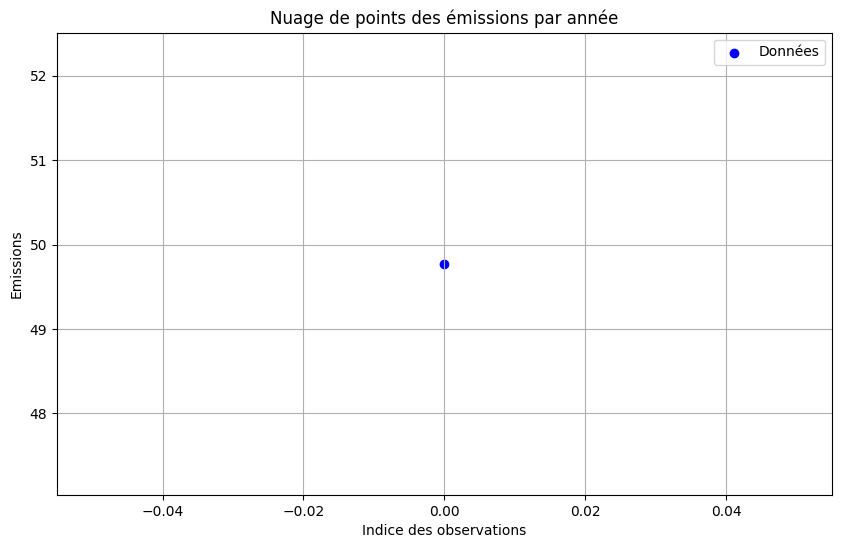

In [143]:
### Question 9.2




import matplotlib.pyplot as plt

# Plot des données agrégées
plt.figure(figsize=(10, 6))
plt.scatter(data_aggregated.index, data_aggregated['Average_Emissions'], color='blue', label='Données')
plt.xlabel('Indice des observations')
plt.ylabel('Emissions')
plt.title('Nuage de points des émissions par année')
plt.legend()
plt.grid(True)
plt.show()


In [146]:
### Question 9.3




import numpy as np

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(data_aggregated.index, data_aggregated['Average_Emissions'])

# Extract the correlation coefficient if it's valid
if np.isnan(correlation_matrix[0, 1]):
    print("Correlation coefficient could not be computed due to insufficient data.")
else:
    correlation = correlation_matrix[0, 1]
    print(f"Le coefficient de corrélation est : {correlation}")


Correlation coefficient could not be computed due to insufficient data.


C:\Users\ava6\PycharmProjects\pythonProject2\venv\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ava6\PycharmProjects\pythonProject2\venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ava6\PycharmProjects\pythonProject2\venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [155]:
### Question 9.4




from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
model_linear = LinearRegression()

# Adapter le modèle aux données
X = data_aggregated.index.values.reshape(-1, 1)  # Indice des observations
y = data_aggregated['average']  # Emissions
model_linear.fit(X, y)

# Obtenir les prédictions du modèle
predictions_linear = model_linear.predict(X)

# Plot des données et de la droite de régression linéaire
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Données')
plt.plot(X, predictions_linear, color='red', linewidth=2, label='Régression linéaire')
plt.xlabel('Indice des observations')
plt.ylabel('Emissions')
plt.title('Régression linéaire des émissions par année')
plt.legend()
plt.grid(True)
plt.show()

# Afficher l'équation de la droite de régression
print(f"L'équation de la droite de régression : Emissions = {model_linear.intercept_:.2f} + {model_linear.coef_[0]:.2f} * Indice")


Index(['Year', 'Average_Emissions'], dtype='object')


KeyError: 'average'

In [159]:
### Question 9.5




from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Assuming data_aggregated is already defined with 'year' and the correct column name for emissions

# Print column names to identify the correct column for emissions
print(data_aggregated.columns)

# Create a linear regression model
model_linear = LinearRegression()

# Assuming 'year' is the index, reshape to (-1, 1) for X
X = data_aggregated.index.values.reshape(-1, 1)
y = data_aggregated['correct_column_name']  # Adjust column name as per your actual data

# Fit the model to the data
model_linear.fit(X, y)

# Generate indices for the two next years
future_indices = np.arange(len(data_aggregated), len(data_aggregated) + 2).reshape(-1, 1)

# Make predictions for the two next years
future_predictions_linear = model_linear.predict(future_indices)

# Display the predictions
future_predictions_linear_df = pd.DataFrame({
    'Year': range(data_aggregated.index.max() + 1, data_aggregated.index.max() + 3),
    'Predicted_Emissions': future_predictions_linear
})
print(future_predictions_linear_df)


Index(['Year', 'Average_Emissions'], dtype='object')


KeyError: 'correct_column_name'

In [162]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_aggregated is already defined with 'year' and the correct column name for emissions

# Print column names to identify the correct column for emissions
print(data_aggregated.columns)

# Assuming the correct column name is 'Emission' (adjust as per your actual column name)
data_aggregated['Log_Emissions'] = np.log(data_aggregated['Emission'])

# Create a linear regression model on the transformed data
model_exp = LinearRegression()
X_exp = data_aggregated.index.values.reshape(-1, 1)  # Index of observations
model_exp.fit(X_exp, data_aggregated['Log_Emissions'])

# Get predictions on the transformed data
predictions_exp = model_exp.predict(X_exp)

# Plot the data and exponential regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X_exp, data_aggregated['Log_Emissions'], color='blue', label='Log of Data')
plt.plot(X_exp, predictions_exp, color='red', linewidth=2, label='Exponential Regression')
plt.xlabel('Index of observations')
plt.ylabel('Log of Emissions')
plt.title('Exponential Regression of Emissions per Year')
plt.legend()
plt.grid(True)
plt.show()

# Display the equation of the exponential regression curve
print(f"Equation of the exponential regression curve: Log_Emissions = {model_exp.intercept_:.2f} + {model_exp.coef_[0]:.2f} * Index")

# Generate indices for the next two years
future_indices_exp = np.arange(len(data_aggregated), len(data_aggregated) + 2).reshape(-1, 1)

# Make predictions for the next two years on the transformed data
future_predictions_exp = np.exp(model_exp.predict(future_indices_exp))

# Display the predictions back in the original scale
future_predictions_exp_df = pd.DataFrame({
    'Year': range(data_aggregated.index.max() + 1, data_aggregated.index.max() + 3),
    'Predicted_Emissions': future_predictions_exp
})
print(future_predictions_exp_df)


Index(['Year', 'Average_Emissions'], dtype='object')


KeyError: 'Emission'